# Concise Implementation of Linear Regression (Section 3.5)

- A. Review the PyTorch documentation to see which loss functions are provided. In
particular, replace the squared loss with Huber’s robust loss function.

- B. How does the solution change as you vary the amount of data generated? Plot the
estimation error for wˆ − w and ˆb − b as a function of the amount of data. Hint:
increase the amount of data logarithmically rather than linearly, i.e., 5, 10, 20, 50, ..., 10,000 rather than 1000, 2000, ..., 10,000.

In [2]:
!pip install d2l==1.0.3
%matplotlib inline

import numpy as np
import torch
from torch import nn
from d2l import torch as d2l

#Set Random Seed for Operation
# seed = 24
# torch.manual_seed(seed)
# torch.cuda.manual_seed_all(seed)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.8 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully uninstalled scipy-1.11.4
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      

**A. Review the PyTorch documentation to see which loss functions are provided. In
particular, replace the squared loss with Huber’s robust loss function.**

# [Full PyTorch Loss Functions List](https://pytorch.org/docs/stable/nn.htmlloss-functions) [Shows that PyTorch is well equipped]


Creates a criterion that measures the mean absolute error (MAE) between each element in the input x and target y.
**nn.L1Loss**

Creates a criterion that measures the mean squared error (squared L2 norm) between each element in the input x and target y.
**nn.MSELoss**

This criterion computes the cross entropy loss between input logits and target.
**nn.CrossEntropyLoss**

The Connectionist Temporal Classification loss.
**nn.CTCLoss**

The negative log likelihood loss.
**nn.NLLLoss**

Negative log likelihood loss with Poisson distribution of target.
**nn.PoissonNLLLoss**

Gaussian negative log likelihood loss.
**nn.GaussianNLLLoss**

The Kullback-Leibler divergence loss.
**nn.KLDivLoss**

Creates a criterion that measures the Binary Cross Entropy between the target and the input probabilities:
**nn.BCELoss**

This loss combines a Sigmoid layer and the BCELoss in one single class.
**nn.BCEWithLogitsLoss**

Creates a criterion that measures the loss given inputs x1, x2, two 1D mini-batch or 0D Tensors, and a label 1D mini-batch or 0D Tensor y (containing 1 or -1).
**nn.MarginRankingLoss**

Measures the loss given an input tensor x and a labels tensor y (containing 1 or -1).
**nn.HingeEmbeddingLoss**

Creates a criterion that optimizes a multi-class multi-classification hinge loss (margin-based loss) between input x (a 2D mini-batch Tensor) and output y (which is a 2D Tensor of target class indices).
**nn.MultiLabelMarginLoss**

Creates a criterion that uses a squared term if the absolute element-wise error falls below delta and a delta-scaled L1 term otherwise.
**nn.HuberLoss**

Creates a criterion that uses a squared term if the absolute element-wise error falls below beta and an L1 term otherwise.
**nn.SmoothL1Loss**

Creates a criterion that optimizes a two-class classification logistic loss between input tensor x and target tensor y (containing 1 or -1).
**nn.SoftMarginLoss**

Creates a criterion that optimizes a multi-label one-versus-all loss based on max-entropy, between input x and target y of size (N,C).
**nn.MultiLabelSoftMarginLoss**

Creates a criterion that measures the loss given input tensors x1​, x2​ and a Tensor label y with values 1 or -1.
**nn.CosineEmbeddingLoss**

Creates a criterion that measures the triplet loss given input tensors a, p, and n (representing anchor, positive, and negative examples, respectively), and a nonnegative, real-valued function ("distance function") used to compute the relationship between the anchor and positive example ("positive distance") and the anchor and negative example ("negative distance").
nn.TripletMarginWithDistanceLoss
**nn.MultiMarginLoss**

Creates a criterion that measures the triplet loss given an input tensors x1, x2, x3 and a margin with a value greater than 0.
**nn.TripletMarginLoss**


Creates a criterion that measures the triplet loss given input tensors a, p, and n (representing anchor, positive, and negative examples, respectively), and a nonnegative, real-valued function ("distance function") used to compute the relationship between the anchor and positive example ("positive distance") and the anchor and negative example ("negative distance").
**nn.TripletMarginWithDistanceLoss**

# Implementing
According to Chat GPT: the Huber Loss is useful in scenarios with outliers as: "it uses a squared term if the absolute element-wise error falls below a certain threshold (delta) and a delta-scaled L1 term otherwise. This essentially reduces the influence of outliers on the loss function." Additionally, "Huber Loss provides a compromise between the robustness of the Mean Absolute Error (MAE) Loss and the differentiability of the Mean Squared Error (MSE) Loss. It behaves like MSE Loss near the origin but like MAE Loss away from the origin."

The MSE Loss and Huber Loss are compared to showcase these outcomes. Each loss functions is strapped to the same linear regression model, utilizes minibatch SGD, and has a consistent training funciton.

## Setup of Model (Linear Regression using Lazy Linear)/Minibatch SGD

In [3]:
class LinearRegression(d2l.Module):
    """The linear regression model implemented with high-level APIs."""
    def __init__(self, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.LazyLinear(1)
        self.net.weight.data.normal_(0, 0.01)
        self.net.bias.data.fill_(0)

@d2l.add_to_class(LinearRegression)
def configure_optimizers(self):
    return torch.optim.SGD(self.parameters(), self.lr)

## MSE Loss Implementation
In the following code MSE loss is implemented and the results displayed

error in estimating w: tensor([ 0.0055, -0.0117])
error in estimating b: tensor([0.0095])


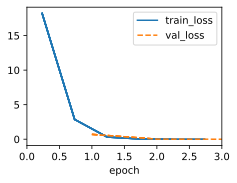

In [4]:
# MSE Loss Function
@d2l.add_to_class(LinearRegression)
def loss(self, y_hat, y):
    fn = nn.MSELoss()
    return fn(y_hat, y)

# Model/Training
model = LinearRegression(lr=0.03)
data = d2l.SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2)
trainer = d2l.Trainer(max_epochs=3)
trainer.fit(model, data)

# Output plots and values
@d2l.add_to_class(LinearRegression)
def get_w_b(self):
    return (self.net.weight.data, self.net.bias.data)
w, b = model.get_w_b()

print(f'error in estimating w: {data.w - w.reshape(data.w.shape)}')
print(f'error in estimating b: {data.b - b}')

# Huber Loss Implementation

error in estimating w: tensor([ 1.7791, -2.0386])
error in estimating b: tensor([2.6511])


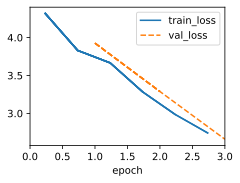

In [ ]:
@d2l.add_to_class(LinearRegression)
def loss(self, y_hat, y):
    fn = nn.HuberLoss() # using the HuberLoss() function optimized for speed
    return fn(y_hat, y)

# Model/Training
model = LinearRegression(lr=0.03)
data = d2l.SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2)
trainer = d2l.Trainer(max_epochs=3)
trainer.fit(model, data)

# Output plots and values
@d2l.add_to_class(LinearRegression)
def get_w_b(self):
    return (self.net.weight.data, self.net.bias.data)
w, b = model.get_w_b()

print(f'error in estimating w: {data.w - w.reshape(data.w.shape)}')
print(f'error in estimating b: {data.b - b}')

**B. How does the solution change as you vary the amount of data generated? Plot the
estimation error for wˆ − w and ˆb − b as a function of the amount of data. Hint:
increase the amount of data logarithmically rather than linearly, i.e., 5, 10, 20, 50, ..., 10,000 rather than 1000, 2000, ..., 10,000.**

/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  ary = asanyarray(ary)
/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


<Figure size 350x250 with 0 Axes>

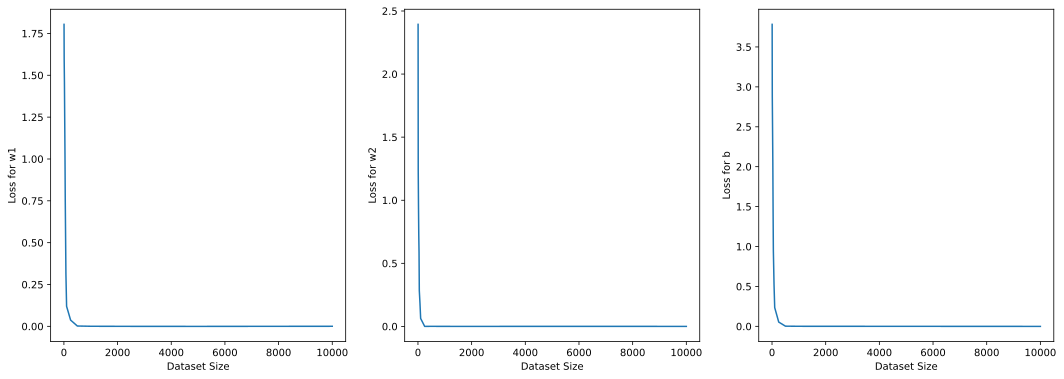

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

def ex5_20220905(data_sizes, model, trainer):
    w_errs = list()
    b_errs = list()
    for data_size in data_sizes:
        data_size = int(data_size)
        data = d2l.SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2,
                                           num_train=data_size, num_val=data_size)
        trainer.fit(model, data)
        w, b = model.get_w_b()
        w_errs.append(data.w - w.reshape(data.w.shape))
        b_errs.append(data.b - b)
    return w_errs, b_errs

# Vary the dataset size and record losses
data_sizes = [5, 10, 20, 30, 40, 50, 75, 100, 250, 500, 1000, 2500, 5000, 10000]  # Add more sizes as needed
model = LinearRegression(lr=0.03)
trainer = d2l.Trainer(max_epochs=3)
w_errs, b_errs = ex5_20220905(data_sizes=data_sizes, model= model, trainer=trainer)

#first_values = [tensor[0, 0] for tensor in w_errs]
#print(w_errs)
w1_err = [tensor[0].item() for tensor in w_errs]
w2_err = [abs(tensor[1].item()) for tensor in w_errs]

# Print the result
plt.clf()
fig = plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.plot(data_sizes, w1_err, label='Loss for w1')
plt.ylabel('Loss for w1')
plt.xlabel('Dataset Size')
plt.subplot(1, 3, 2)
plt.plot(data_sizes, w2_err, label='Loss for w2')
plt.ylabel('Loss for w2')
plt.xlabel('Dataset Size')
plt.subplot(1, 3, 3)
plt.plot(data_sizes, b_errs, label='Loss for b')
plt.xlabel('Dataset Size')
plt.ylabel('Loss for b')
plt.show()


As shown above, increasing the amount of data sharply decreases the error, akin to the shape of a y ~ 1/x function.